In [17]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
from urllib.request import urlretrieve
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from scipy.stats import chi2_contingency
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN
from sklearn.metrics import classification_report

In [18]:
cleaned_df=pd.read_csv('/content/hot_encoded_df (1)')
cleaned_df

,destination_Home,destination_No Urgent Place,destination_Work,passanger_Alone,passanger_Friend(s),passanger_Kid(s),passanger_Partner,weather_Rainy,weather_Snowy,weather_Sunny,...,Restaurant20To50_less1,Restaurant20To50_never,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,55,0,1,0,0,0,1,1
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,80,0,1,0,0,0,1,0
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,80,0,1,0,0,0,1,1
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,80,0,1,1,0,0,1,0
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,80,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12002,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,55,0,1,0,0,1,0,1
12003,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,55,0,1,0,0,0,1,1
12004,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,30,0,1,0,0,1,0,0
12005,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,30,0,1,1,1,0,1,0


In [19]:
#Number of values of in the target columns.
cleaned_df['Y'].value_counts()

,count
Y,
1,6825
0,5182


<Axes: xlabel='Y', ylabel='count'>

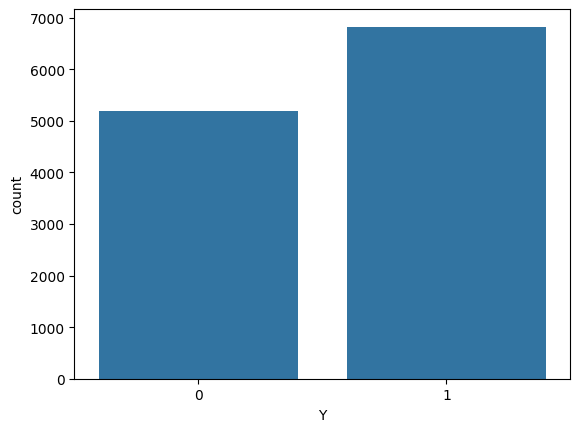

In [20]:
#Plotting the count of values for better visualization
sns.countplot(x=cleaned_df['Y'])

In [23]:
#There is clearly an imbalance in the values of Y.
#Using undersampling technique to overcome this issue.
#But first splitting the data into train and test data to use for training and testing modals to find the effectiveness of these sampling techniques.

x_train,x_test,y_train,y_test=train_test_split(cleaned_df.drop(columns=['Y']),cleaned_df['Y'],train_size=0.8,random_state=42)
underSample=RandomUnderSampler(random_state=42)
x_train_us,y_train_us=underSample.fit_resample(x_train,y_train)
y_train_us.value_counts()

,count
Y,
0,4154
1,4154


In [30]:
#Using Random forest classifier for prediction by training with this undersampled data.
model=RandomForestClassifier(random_state=42)
model.fit(x_train_us,y_train_us)
y_pred=model.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.68      0.75      0.71      1028
           1       0.80      0.74      0.77      1374

    accuracy                           0.74      2402
   macro avg       0.74      0.74      0.74      2402
weighted avg       0.75      0.74      0.74      2402



In [34]:
#Using Synthetic minority oversampling technique(SMOTE) instead of under sampling to create training data and predicting the test data
oversampler=SMOTE(random_state=42)
x_train_smote,y_train_smote=oversampler.fit_resample(x_train,y_train)
y_train_smote.value_counts()

,count
Y,
0,5451
1,5451


In [35]:
#Using Random forest classifier for prediction by training with this oversampled data.
model=RandomForestClassifier(random_state=42)
model.fit(x_train_smote,y_train_smote)
y_pred=model.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.73      0.68      0.70      1028
           1       0.77      0.81      0.79      1374

    accuracy                           0.75      2402
   macro avg       0.75      0.74      0.75      2402
weighted avg       0.75      0.75      0.75      2402



In [38]:
#Using SMOTE+ENN which is a combination of oversampling and undersampling
smoteennsampler=SMOTEENN(random_state=42)
x_train_smotenn,y_train_smotenn=smoteennsampler.fit_resample(x_train,y_train)
y_train_smotenn.value_counts()

,count
Y,
0,2300
1,1611


In [39]:
#Using Random forest classifier for prediction by training with this data created using SMOTE + ENN sampling technique.
model=RandomForestClassifier(random_state=42)
model.fit(x_train_smotenn,y_train_smotenn)
y_pred=model.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.61      0.72      0.66      1028
           1       0.76      0.65      0.70      1374

    accuracy                           0.68      2402
   macro avg       0.68      0.69      0.68      2402
weighted avg       0.69      0.68      0.68      2402



In [40]:
#Predictions of the model when no sampling techniques were implemented.
model=RandomForestClassifier(random_state=42)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.74      0.67      0.70      1028
           1       0.77      0.82      0.79      1374

    accuracy                           0.76      2402
   macro avg       0.75      0.75      0.75      2402
weighted avg       0.76      0.76      0.75      2402

